# **3.2 Separación, Validación y Evaluación para algoritmos de ML**

## Ejemplo 01

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Primero, generaremos un conjunto de blobs. Estos datos son "dummy" y nos ayudarán a entrenar casi cualquier sistema. Si tienes datos propios, puedes usarlos en lugar de los blobs.


Ahora mismo no nos interesa de dónde vienen los datos, por lo que los Blobs nos funcionarán bien.

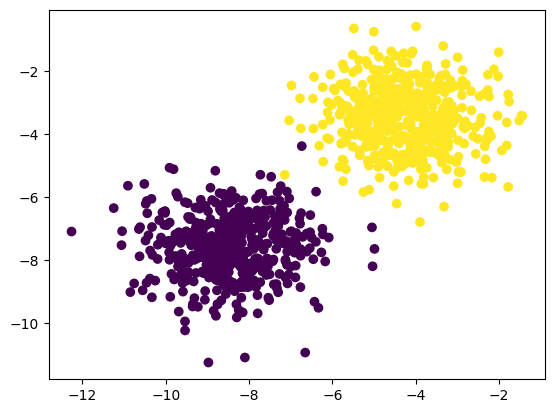

In [ ]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [ ]:
x

array([[-9.70442967, -8.20795958],
       [-2.88861177, -3.1532395 ],
       [-7.34061816, -8.76585953],
       ...,
       [-2.87969517, -2.29652971],
       [-4.19730408, -4.65846807],
       [-2.66151743, -3.23426337]])

Después, crearemos una función que haga la partición en 3 secciones. Usaremos 0.60 (60% para entrenamiento), 0.10 (10 % para validación) y 0.30 (30% para pruebas).

Nota que sólo será util si necesitas tres particiones (entrenamiento, validación y prueba). Si no necesitas tres, mejor utiliza la función train_test_split.

In [ ]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
  temp_size = porcentaje_validacion + porcentaje_prueba
  print(temp_size)
  x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size=temp_size)
  if(porcentaje_validacion > 0):
    test_size = porcentaje_prueba/temp_size
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=test_size)
  else:
    return [x_train, None, x_temp, y_train, None, y_temp]
  return [x_train, x_val, x_test, y_train, y_val, y_test]

In [ ]:
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.60,0.10,0.30)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

0.4
(600, 2)
(100, 2)
(300, 2)


# Ejemplo 02

En este ejemplo vamos a generar unos datos dummy con numpy, y vamos a separarlos de tal manera que puedas elegir en cuantas separaciones deseas con K-fold. Es importante que veas como los datos son separados aleatoriamente y no se repiten en cada fold. Si la cantidad de folds no permiten bloques, algunos ciclos tendrán mas (o menos) datos.

Nota: Retira el random_seed para tener datos únicos en cada ocasión

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

In [ ]:
data = np.array([1,2,3,4,5,6,7,8,10,11,12])

K = 4
random_seed = 48
aleatorio = True

kfold = KFold(n_splits = K, shuffle=aleatorio, random_state=random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(data):
  print('Ciclo: '+str(ciclo))
  print('\t datos para entrenamiento: '+str(data[indices_train]))
  print('\t datos para prueba: '+str(data[indices_test]))
  ciclo+=1

Ciclo: 1
	 datos para entrenamiento: [ 1  2  3  4  5  6 11 12]
	 datos para prueba: [ 7  8 10]
Ciclo: 2
	 datos para entrenamiento: [ 1  2  4  5  7  8 10 11]
	 datos para prueba: [ 3  6 12]
Ciclo: 3
	 datos para entrenamiento: [ 1  3  4  6  7  8 10 12]
	 datos para prueba: [ 2  5 11]
Ciclo: 4
	 datos para entrenamiento: [ 2  3  5  6  7  8 10 11 12]
	 datos para prueba: [1 4]


# Ejemplo 03

En este ejemplo vamos a generar unos datos dummy con numpy, y vamos a separarlos de tal manera que puedas elegir en cuantas separaciones deseas con K-fold. Es importante que veas como los datos son separados aleatoriamente y no se repiten en cada fold. Si la cantidad de folds no permiten bloques, algunos ciclos tendrán mas (o menos) datos.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

In [ ]:
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

K = data.shape[0] # K = numero de muestras
random_seed = 48
aleatorio = True

kfold = KFold(n_splits=K, shuffle=aleatorio, random_state=random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(data):
  print('Ciclo: '+str(ciclo))
  print('\t datos para entrenamiento: '+str(data[indices_train]))
  print('\t datos para prueba: '+str(data[indices_test]))
  ciclo+=1

Ciclo: 1
	 datos para entrenamiento: [ 1  2  3  4  5  6  7  8  9 11 12]
	 datos para prueba: [10]
Ciclo: 2
	 datos para entrenamiento: [ 1  2  3  4  5  6  7  8 10 11 12]
	 datos para prueba: [9]
Ciclo: 3
	 datos para entrenamiento: [ 1  2  3  4  5  6  7  9 10 11 12]
	 datos para prueba: [8]
Ciclo: 4
	 datos para entrenamiento: [ 1  2  3  4  5  7  8  9 10 11 12]
	 datos para prueba: [6]
Ciclo: 5
	 datos para entrenamiento: [ 1  2  4  5  6  7  8  9 10 11 12]
	 datos para prueba: [3]
Ciclo: 6
	 datos para entrenamiento: [ 1  2  3  4  5  6  8  9 10 11 12]
	 datos para prueba: [7]
Ciclo: 7
	 datos para entrenamiento: [ 1  2  3  4  5  6  7  8  9 10 11]
	 datos para prueba: [12]
Ciclo: 8
	 datos para entrenamiento: [ 1  2  3  4  5  6  7  8  9 10 12]
	 datos para prueba: [11]
Ciclo: 9
	 datos para entrenamiento: [ 1  2  3  4  6  7  8  9 10 11 12]
	 datos para prueba: [5]
Ciclo: 10
	 datos para entrenamiento: [ 1  3  4  5  6  7  8  9 10 11 12]
	 datos para prueba: [2]
Ciclo: 11
	 datos para ent